In [418]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE
from tabulate import tabulate
import json
import numpy as np

# 1. Prepare data

In [419]:
jobs = pd.read_csv("../data/clean job_data_1905 have new salary handler.csv")
jobs = jobs.drop(columns = ['Sex', 'Contract Type'])
jobs_test = pd.read_csv("../data/clean data new.csv")
jobs_test = jobs_test.drop(columns = ['Sex', 'Contract Type'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,10000000.0,Nhân viên,Dưới 1 năm,Khác,tiếng anh,vi,Hồ Chí Minh
1,12000000.0,Nhân viên,1 năm,Khác,Không yêu cầu,vi,Hà Nội
2,10000000.0,Nhân viên,Không yêu cầu kinh nghiệm,Khác,tiếng anh,vi,Hà Nội
3,8000000.0,Nhân viên,1 năm,Khác,Không yêu cầu,vi,Hồ Chí Minh
4,9000000.0,Nhân viên,2 năm,Khác,Không yêu cầu,vi,Hồ Chí Minh


In [420]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                1394 non-null   float64
 1   Level                 1394 non-null   object 
 2   Year of Experience    1394 non-null   object 
 3   Programming Language  1394 non-null   object 
 4   Language              1394 non-null   object 
 5   Lang                  1394 non-null   object 
 6   Location              1394 non-null   object 
dtypes: float64(1), object(6)
memory usage: 76.4+ KB


# 2. Feture engineering

## 2.1 Encoding

- StandardScaler for 'Salary'

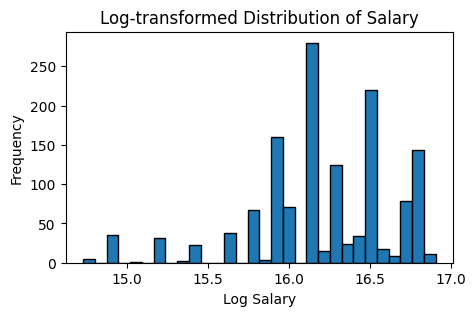

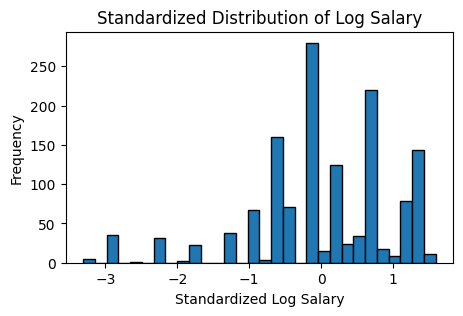

In [421]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có DataFrame jobs với dữ liệu ban đầu
# Áp dụng Log Transformation
jobs['Salary'] = np.log(jobs['Salary'])

# Kiểm tra phân phối sau khi biến đổi Log
plt.figure(figsize=(5, 3))
plt.hist(jobs['Salary'], bins=30, edgecolor='k')
plt.title('Log-transformed Distribution of Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.show()

# Chuẩn hóa phân phối chuẩn cho biến Salary_log
scaler = StandardScaler()
jobs['Salary'] = scaler.fit_transform(jobs[['Salary']])

# Kiểm tra phân phối sau khi chuẩn hóa
plt.figure(figsize=(5, 3))
plt.hist(jobs['Salary'], bins=30, edgecolor='k')
plt.title('Standardized Distribution of Log Salary')
plt.xlabel('Standardized Log Salary')
plt.ylabel('Frequency')
plt.show()


In [422]:
# Áp dụng Log Transformation cho tập test
jobs_test['Salary'] = np.log(jobs_test['Salary'])

jobs_test['Salary'] = scaler.transform(jobs_test[['Salary']], copy=True)
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,0.874094,Nhân viên,2 năm,java,tiếng anh,vi,Hà Nội
1,0.728681,Trưởng/Phó phòng,2 năm,Khác,Không yêu cầu,vi,Hà Nội
2,1.376867,Trưởng nhóm,3 năm,Khác,Không yêu cầu,vi,Hà Nội
3,1.879639,Nhân viên,3 năm,typescript,Không yêu cầu,vi,Hà Nội
4,1.879639,Nhân viên,3 năm,javascript,Không yêu cầu,vi,Hà Nội


In [423]:
# # Tạo các biểu đồ trên cùng một hàng
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# # Kiểm tra phân phối ban đầu của biến Salary
# axes[0].hist(jobs['Salary'], bins=30, edgecolor='k')
# axes[0].set_title('Initial Distribution of Salary')
# axes[0].set_xlabel('Salary')
# axes[0].set_ylabel('Frequency')

# # Chuẩn hóa phân phối chuẩn cho biến Salary
# scaler = StandardScaler()
# jobs['Salary'] = scaler.fit_transform(jobs[['Salary']])

# # Kiểm tra phân phối sau khi chuẩn hóa
# axes[1].hist(jobs['Salary'], bins=30, edgecolor='k')
# axes[1].set_title('Standardized Distribution of Salary')
# axes[1].set_xlabel('Standardized Salary')
# axes[1].set_ylabel('Frequency')

# # Hiển thị các biểu đồ
# plt.tight_layout()
# plt.show()

In [424]:
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,-0.184887,Nhân viên,Dưới 1 năm,Khác,tiếng anh,vi,Hồ Chí Minh
1,0.225908,Nhân viên,1 năm,Khác,Không yêu cầu,vi,Hà Nội
2,-0.184887,Nhân viên,Không yêu cầu kinh nghiệm,Khác,tiếng anh,vi,Hà Nội
3,-0.687659,Nhân viên,1 năm,Khác,Không yêu cầu,vi,Hồ Chí Minh
4,-0.422278,Nhân viên,2 năm,Khác,Không yêu cầu,vi,Hồ Chí Minh


- Encoding for 'Level'

In [425]:
encoder = OrdinalEncoder(categories=[['Thực tập sinh', 'Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc']])
encoded_level = encoder.fit_transform(jobs[['Level']])
jobs['Level'] = encoded_level
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,-0.184887,1.0,Dưới 1 năm,Khác,tiếng anh,vi,Hồ Chí Minh
1,0.225908,1.0,1 năm,Khác,Không yêu cầu,vi,Hà Nội
2,-0.184887,1.0,Không yêu cầu kinh nghiệm,Khác,tiếng anh,vi,Hà Nội
3,-0.687659,1.0,1 năm,Khác,Không yêu cầu,vi,Hồ Chí Minh
4,-0.422278,1.0,2 năm,Khác,Không yêu cầu,vi,Hồ Chí Minh


In [426]:
jobs_test['Level'] = encoder.transform(jobs_test[['Level']])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,0.874094,1.0,2 năm,java,tiếng anh,vi,Hà Nội
1,0.728681,3.0,2 năm,Khác,Không yêu cầu,vi,Hà Nội
2,1.376867,2.0,3 năm,Khác,Không yêu cầu,vi,Hà Nội
3,1.879639,1.0,3 năm,typescript,Không yêu cầu,vi,Hà Nội
4,1.879639,1.0,3 năm,javascript,Không yêu cầu,vi,Hà Nội


- Encoding for 'Lang'

In [427]:
encoder = OrdinalEncoder(categories=[['vi', 'en']])
encoded_l = encoder.fit_transform(jobs[['Lang']])
jobs['Lang'] = encoded_l
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,-0.184887,1.0,Dưới 1 năm,Khác,tiếng anh,0.0,Hồ Chí Minh
1,0.225908,1.0,1 năm,Khác,Không yêu cầu,0.0,Hà Nội
2,-0.184887,1.0,Không yêu cầu kinh nghiệm,Khác,tiếng anh,0.0,Hà Nội
3,-0.687659,1.0,1 năm,Khác,Không yêu cầu,0.0,Hồ Chí Minh
4,-0.422278,1.0,2 năm,Khác,Không yêu cầu,0.0,Hồ Chí Minh


In [428]:
jobs_test['Lang'] = encoder.transform(jobs_test[['Lang']])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,0.874094,1.0,2 năm,java,tiếng anh,0.0,Hà Nội
1,0.728681,3.0,2 năm,Khác,Không yêu cầu,0.0,Hà Nội
2,1.376867,2.0,3 năm,Khác,Không yêu cầu,0.0,Hà Nội
3,1.879639,1.0,3 năm,typescript,Không yêu cầu,0.0,Hà Nội
4,1.879639,1.0,3 năm,javascript,Không yêu cầu,0.0,Hà Nội


- Encoding for 'Year of Experience'

In [429]:
encoder = OrdinalEncoder(categories=[['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm']])
encoded_YoE = encoder.fit_transform(jobs[['Year of Experience']])
jobs['Year of Experience'] = encoded_YoE
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,-0.184887,1.0,1.0,Khác,tiếng anh,0.0,Hồ Chí Minh
1,0.225908,1.0,2.0,Khác,Không yêu cầu,0.0,Hà Nội
2,-0.184887,1.0,0.0,Khác,tiếng anh,0.0,Hà Nội
3,-0.687659,1.0,2.0,Khác,Không yêu cầu,0.0,Hồ Chí Minh
4,-0.422278,1.0,3.0,Khác,Không yêu cầu,0.0,Hồ Chí Minh


In [430]:
jobs_test['Year of Experience'] = encoder.transform(jobs_test[['Year of Experience']])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,0.874094,1.0,3.0,java,tiếng anh,0.0,Hà Nội
1,0.728681,3.0,3.0,Khác,Không yêu cầu,0.0,Hà Nội
2,1.376867,2.0,4.0,Khác,Không yêu cầu,0.0,Hà Nội
3,1.879639,1.0,4.0,typescript,Không yêu cầu,0.0,Hà Nội
4,1.879639,1.0,4.0,javascript,Không yêu cầu,0.0,Hà Nội


- Encoding for 'Programming Language'

In [431]:
encoder = TargetEncoder()
encoded_pl = encoder.fit_transform(jobs['Programming Language'], jobs['Salary'])
jobs['Programming Language'] = encoded_pl

In [432]:
jobs_test['Programming Language'] = encoder.transform(jobs_test[['Programming Language']])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Lang,Location
0,0.874094,1.0,3.0,0.279929,tiếng anh,0.0,Hà Nội
1,0.728681,3.0,3.0,-0.096797,Không yêu cầu,0.0,Hà Nội
2,1.376867,2.0,4.0,-0.096797,Không yêu cầu,0.0,Hà Nội
3,1.879639,1.0,4.0,0.305132,Không yêu cầu,0.0,Hà Nội
4,1.879639,1.0,4.0,0.120592,Không yêu cầu,0.0,Hà Nội


- Encoding for 'Language'

In [433]:
# encoder = TargetEncoder()
# encoded_language = encoder.fit_transform(jobs['Language'], jobs['Salary'])
# jobs['Language'] = encoded_language
# from category_encoders import OneHotEncoder

one_hot_encoder = OneHotEncoder()
job_pl = one_hot_encoder.fit_transform(jobs['Language'])

jobs = pd.concat([jobs, job_pl], axis=1)
jobs = jobs.drop(columns = ['Language'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Lang,Location,Language_1,Language_2,Language_3
0,-0.184887,1.0,1.0,-0.096797,0.0,Hồ Chí Minh,1,0,0
1,0.225908,1.0,2.0,-0.096797,0.0,Hà Nội,0,1,0
2,-0.184887,1.0,0.0,-0.096797,0.0,Hà Nội,1,0,0
3,-0.687659,1.0,2.0,-0.096797,0.0,Hồ Chí Minh,0,1,0
4,-0.422278,1.0,3.0,-0.096797,0.0,Hồ Chí Minh,0,1,0


In [434]:
job_test_pl = one_hot_encoder.transform(jobs_test['Language'])

jobs_test = pd.concat([jobs_test, job_pl], axis=1)
jobs_test = jobs_test.drop(columns = ['Language'])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Lang,Location,Language_1,Language_2,Language_3
0,0.874094,1.0,3.0,0.279929,0.0,Hà Nội,1.0,0.0,0.0
1,0.728681,3.0,3.0,-0.096797,0.0,Hà Nội,0.0,1.0,0.0
2,1.376867,2.0,4.0,-0.096797,0.0,Hà Nội,1.0,0.0,0.0
3,1.879639,1.0,4.0,0.305132,0.0,Hà Nội,0.0,1.0,0.0
4,1.879639,1.0,4.0,0.120592,0.0,Hà Nội,0.0,1.0,0.0


- Encoding for 'Location'

In [435]:
# encoder = TargetEncoder()
# encoded_location = encoder.fit_transform(jobs['Location'], jobs['Salary'])
# jobs['Location'] = encoded_location

one_hot_encoder = OneHotEncoder()
job_pl = one_hot_encoder.fit_transform(jobs['Location'])

jobs = pd.concat([jobs, job_pl], axis=1)
jobs = jobs.drop(columns = ['Location'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Lang,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4
0,-0.184887,1.0,1.0,-0.096797,0.0,1,0,0,1,0,0,0
1,0.225908,1.0,2.0,-0.096797,0.0,0,1,0,0,1,0,0
2,-0.184887,1.0,0.0,-0.096797,0.0,1,0,0,0,1,0,0
3,-0.687659,1.0,2.0,-0.096797,0.0,0,1,0,1,0,0,0
4,-0.422278,1.0,3.0,-0.096797,0.0,0,1,0,1,0,0,0


In [436]:
job_test_pl = one_hot_encoder.transform(jobs_test['Location'])

jobs_test = pd.concat([jobs_test, job_pl], axis=1)
jobs_test = jobs_test.drop(columns = ['Location'])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Lang,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4
0,0.874094,1.0,3.0,0.279929,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.728681,3.0,3.0,-0.096797,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.376867,2.0,4.0,-0.096797,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.879639,1.0,4.0,0.305132,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.879639,1.0,4.0,0.120592,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [437]:
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Lang,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4
0,-0.184887,1.0,1.0,-0.096797,0.0,1,0,0,1,0,0,0
1,0.225908,1.0,2.0,-0.096797,0.0,0,1,0,0,1,0,0
2,-0.184887,1.0,0.0,-0.096797,0.0,1,0,0,0,1,0,0
3,-0.687659,1.0,2.0,-0.096797,0.0,0,1,0,1,0,0,0
4,-0.422278,1.0,3.0,-0.096797,0.0,0,1,0,1,0,0,0


In [438]:
jobs = jobs.groupby(['Level', 'Year of Experience', 'Programming Language', 'Language_1', 'Language_2', 'Language_3', 'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Lang']).mean().reset_index()

In [439]:
jobs

,Level,Year of Experience,Programming Language,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4,Lang,Salary
0,0.0,0.0,-0.096797,0,0,1,0,1,0,0,0.0,-1.998026
1,0.0,0.0,-0.096797,0,1,0,0,1,0,0,0.0,-2.302234
2,0.0,0.0,-0.096797,0,1,0,1,0,0,0,0.0,-2.897598
3,0.0,0.0,-0.096797,1,0,0,0,1,0,0,0.0,-2.789567
4,0.0,0.0,-0.096797,1,0,0,0,1,0,0,1.0,-2.897598
...,...,...,...,...,...,...,...,...,...,...,...,...
329,4.0,2.0,-0.096797,1,0,0,0,0,1,0,0.0,-0.184887
330,4.0,3.0,-0.096797,0,1,0,0,1,0,0,0.0,1.376867
331,4.0,3.0,-0.096797,0,1,0,1,0,0,0,0.0,0.477294
332,4.0,6.0,-0.096797,0,1,0,0,1,0,0,0.0,1.376867


## 2.2 Correlation with target variable

In [387]:
# Tính toán ma trận tương quan
correlation_matrix = jobs.corr()

# Hiển thị tương quan của từng đặc trưng với biến mục tiêu
target_correlation = correlation_matrix['Salary']
print(target_correlation)

Level                   0.476594
Year of Experience      0.668963
Programming Language   -0.034669
Language_1             -0.144832
Language_2              0.088978
Language_3              0.094998
Location_1             -0.078877
Location_2              0.097327
Location_3             -0.027644
Location_4             -0.025343
Lang                   -0.082934
Salary                  1.000000
Name: Salary, dtype: float64


# 3. Training

In [388]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    'XGB': xgb.XGBRegressor()
}

In [389]:
X = jobs.drop(columns = ['Salary'])
y = jobs['Salary']

In [390]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

# Khởi tạo KFold để kiểm định chéo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    # Đánh giá mô hình sử dụng cross-validation và r2 làm thước đo
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    # Tính R² trung bình
    mean_r2 = np.mean(scores)
    results.append((name, mean_r2))

# Sắp xếp kết quả theo R² Score từ cao xuống thấp
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

# In kết quả
print(results_df)

# Lấy tên của mô hình có điểm số R² cao nhất
model_best = results_df['Model'].iloc[0]
print("Best performing model:", model_best)

                       Model  R2 Score
4      RandomForestRegressor  0.725867
7                        XGB  0.686315
3  GradientBoostingRegressor  0.679214
6                        SVR  0.667621
1                      Ridge  0.514310
0           LinearRegression  0.512797
5      DecisionTreeRegressor  0.508881
2                      Lasso  0.166380
Best performing model: RandomForestRegressor


In [391]:

# Khởi tạo KFold để kiểm định chéo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
# Định nghĩa mô hình
model = models[model_best]

# Lặp qua số lượng đặc trưng từ 2 đến số lượng đặc trưng tối đa
for i in range(2, len(X.columns) + 1):
    # Thiết lập RFE với số đặc trưng hiện tại
    selector = RFE(model, n_features_to_select=i, step=1)
    selector.fit(X, y)  # Lưu ý là sử dụng toàn bộ dữ liệu X, y
    
    # Đặc trưng được chọn
    selected_features = X.columns[selector.support_]
    
    # Tạo tập dữ liệu chỉ với các đặc trưng được chọn
    X_selected = selector.transform(X)
    
    # Đánh giá mô hình sử dụng cross-validation
    scores = cross_val_score(model, X_selected, y, cv=kf, scoring='r2')
    
    # Tính R² Score trung bình
    mean_r2 = np.mean(scores)
    
    # Lưu kết quả
    results.append((i, selected_features.tolist(), mean_r2))

# Chuyển kết quả vào DataFrame và sắp xếp theo R²
results_df = pd.DataFrame(results, columns=['Num Features', 'Features', 'R2 Score'])
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# In kết quả
print(results_df)

# Lưu các đặc trưng quan trọng nhất từ mô hình tốt nhất
variable_important = results_df.iloc[0, 1]
print("Most important features:", variable_important)


   Num Features                                           Features  R2 Score
7             9  [Level, Year of Experience, Programming Langua...  0.735207
6             8  [Level, Year of Experience, Programming Langua...  0.728494
8            10  [Level, Year of Experience, Programming Langua...  0.721175
9            11  [Level, Year of Experience, Programming Langua...  0.717694
4             6  [Level, Year of Experience, Programming Langua...  0.711202
5             7  [Level, Year of Experience, Programming Langua...  0.704445
3             5  [Level, Year of Experience, Programming Langua...  0.704420
0             2                        [Level, Year of Experience]  0.668090
2             4  [Level, Year of Experience, Programming Langua...  0.586549
1             3  [Level, Year of Experience, Programming Language]  0.563745
Most important features: ['Level', 'Year of Experience', 'Programming Language', 'Language_1', 'Language_2', 'Language_3', 'Location_1', 'Location_2', 'L

In [392]:
# Danh sách các mô hình và tham số tương ứng
models = {
    'RandomForestRegressor': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }),
    'XGBRegressor': (xgb.XGBRegressor(), {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    })
}

In [393]:

# Phân chia tập dữ liệu
X = jobs[variable_important]
y = jobs['Salary']

# Kết quả lưu tham số tốt nhất
best_params = {}

KFold = KFold(n_splits=5, shuffle=True, random_state=42)

# Đào tạo và điều chỉnh mô hình cho từng loại
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    # Thiết lập Grid Search với kiểm định chéo
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=KFold, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X, y)
    
    # Lưu tham số tốt nhất
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Ghi kết quả vào file JSON
with open('best_params_new.json', 'w') as fp:
    json.dump(best_params, fp)

print("All best parameters have been saved to 'best_params_new.json'.")


Training RandomForestRegressor...
Fitting 5 folds for each of 162 candidates, totalling 810 fits


d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-p

Best parameters for RandomForestRegressor: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training XGBRegressor...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for XGBRegressor: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Training SVR...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for SVR: {'C': 10.0, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
All best parameters have been saved to 'best_params_new.json'.


In [394]:
#  Loại bỏ hàng có biến bằng NaN
jobs_test = jobs_test.dropna()

In [441]:
from sklearn.model_selection import cross_val_score, KFold

X = jobs_test[variable_important]
y = jobs_test['Salary']

# Đọc file JSON
with open('best_params_new.json', 'r') as fp:
    best_params = json.load(fp)

# Tạo dictionary của các mô hình đã cấu hình với random_state
models_configured = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42, **best_params['RandomForestRegressor']),
    'XGBRegressor': xgb.XGBRegressor(random_state=42, **best_params['XGBRegressor'])
}

# Khởi tạo KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá mỗi mô hình sử dụng cross-validation và lưu kết quả
results = {}
for name, model in models_configured.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results[name] = np.mean(scores)

# Sắp xếp kết quả theo R2 Score giảm dần và in ra
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for model_name, score in sorted_results:
    print(f"{model_name}: R2 Score = {score}")

RandomForestRegressor: R2 Score = 0.6363134292002455
XGBRegressor: R2 Score = 0.6165036222873498
